In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def encode_tools(data):
    le = LabelEncoder()
    df=data.copy()
    for i in df.columns:
        df[i]=le.fit_transform(df[i])
    return df
tools= pd.read_csv(r'C:\Python\kaggle\@ON-工业AI\data\raw_data\tools.csv')
tools=encode_tools(tools)
tools.drop(['Unnamed: 0','ID','TOOL_ID (#3)'],axis=1,inplace=True)
tools.to_csv(r'C:\Python\kaggle\@ON-工业AI\data\tmp\tools_xgb_try.csv')

In [24]:
import xgboost as xgb


train_y=pd.read_csv(r'C:\Python\kaggle\@ON-工业AI\data\raw_data\label.csv',header=None)
train_x=tools.loc[:499,:].values
test_x=tools.loc[500:,:].values
train_y=train_y[1].values
test_y=pd.DataFrame(index=tools.loc[500:,:].index)

In [25]:
train_y

array([ 2.94507888,  2.95509224,  2.74126417,  2.79933593,  2.69209253,
        2.62585305,  2.69800666,  2.78823074,  2.7734526 ,  2.85124237,
        3.04520786,  2.76598448,  2.6761605 ,  2.7171605 ,  2.7589083 ,
        2.72070904,  2.79067927,  2.71363321,  2.7928996 ,  2.72104985,
        2.74118224,  2.55801887,  2.9391182 ,  2.66917259,  3.21183937,
        3.03658188,  2.79820007,  3.20615626,  2.98691672,  3.07633994,
        3.45455583,  2.81648282,  2.85137767,  2.48565156,  2.6785605 ,
        2.56464038,  2.46278502,  2.70309432,  2.79496975,  2.68915744,
        2.82283487,  2.60668986,  3.13033856,  3.0988871 ,  2.95483926,
        3.02821646,  2.84588207,  2.88243159,  2.89590284,  2.93870391,
        2.94748085,  2.7408277 ,  2.91333797,  2.41914274,  2.79162912,
        2.8177279 ,  3.14150489,  2.7980477 ,  2.96471837,  2.71167721,
        3.01504199,  2.74656927,  2.53488344,  2.87790494,  2.86073922,
        3.00740621,  2.98944815,  2.69916577,  2.67492596,  2.67

In [28]:

dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x)
# dtrain.save_binary("train.buffer")
# dtest = xgb.DMatrix('test.svm.buffer')

params={
        'booster':'gbtree',
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'max_depth':7,
        'lambda':100,
        'subsample':0.7,
        'colsample_bytree':0.7,
        'eta': 0.008,
        'seed':1024,
        'nthread':8
    }

#train
watchlist  = [(dtrain,'train')]
#evallist = [(dtest, 'eval'), (dtrain, 'train')]
model = xgb.train(params,dtrain,num_boost_round=500,evals=watchlist, early_stopping_rounds=10)


#predict test set
test_y['pred'] = model.predict(dtest,ntree_limit=bst.best_ntree_limit)
# test_a_b.to_csv('test_1.csv',index=None)

#bst.save_model('0001.model')

# bst.dump_model('dump.raw.txt')
# 转储模型和特征映射
# bst.dump_model('dump.raw.txt','featmap.txt')
# bst = xgb.Booster({'nthread':4}) #init model
# bst.load_model("model.bin") # load data

xgb.plot_importance(model)

[0]	train-rmse:2.34041
Will train until train-rmse hasn't improved in 10 rounds.
[1]	train-rmse:2.32597
[2]	train-rmse:2.31151
[3]	train-rmse:2.29724
[4]	train-rmse:2.28299
[5]	train-rmse:2.26898
[6]	train-rmse:2.25496
[7]	train-rmse:2.2411
[8]	train-rmse:2.22708
[9]	train-rmse:2.21344
[10]	train-rmse:2.19981
[11]	train-rmse:2.18618
[12]	train-rmse:2.17268
[13]	train-rmse:2.15926
[14]	train-rmse:2.14601
[15]	train-rmse:2.1328
[16]	train-rmse:2.11978
[17]	train-rmse:2.10678
[18]	train-rmse:2.09373
[19]	train-rmse:2.08085
[20]	train-rmse:2.06793
[21]	train-rmse:2.05512
[22]	train-rmse:2.04233
[23]	train-rmse:2.02982
[24]	train-rmse:2.01726
[25]	train-rmse:2.00484
[26]	train-rmse:1.99251
[27]	train-rmse:1.98018
[28]	train-rmse:1.96817
[29]	train-rmse:1.95613
[30]	train-rmse:1.94403
[31]	train-rmse:1.93203
[32]	train-rmse:1.92016
[33]	train-rmse:1.90814
[34]	train-rmse:1.89623
[35]	train-rmse:1.8845
[36]	train-rmse:1.87292
[37]	train-rmse:1.86141
[38]	train-rmse:1.84987
[39]	train-rmse:1.8

[324]	train-rmse:0.367786
[325]	train-rmse:0.366166
[326]	train-rmse:0.364543
[327]	train-rmse:0.362961
[328]	train-rmse:0.361409
[329]	train-rmse:0.359889
[330]	train-rmse:0.358386
[331]	train-rmse:0.356902
[332]	train-rmse:0.35542
[333]	train-rmse:0.353924
[334]	train-rmse:0.352445
[335]	train-rmse:0.35098
[336]	train-rmse:0.349547
[337]	train-rmse:0.348045
[338]	train-rmse:0.346615
[339]	train-rmse:0.345161
[340]	train-rmse:0.343789
[341]	train-rmse:0.342378
[342]	train-rmse:0.340954
[343]	train-rmse:0.339576
[344]	train-rmse:0.338187
[345]	train-rmse:0.336821
[346]	train-rmse:0.335475
[347]	train-rmse:0.33418
[348]	train-rmse:0.332859
[349]	train-rmse:0.331593
[350]	train-rmse:0.330281
[351]	train-rmse:0.328993
[352]	train-rmse:0.327735
[353]	train-rmse:0.326466
[354]	train-rmse:0.325185
[355]	train-rmse:0.323933
[356]	train-rmse:0.322702
[357]	train-rmse:0.321424
[358]	train-rmse:0.32022
[359]	train-rmse:0.319002
[360]	train-rmse:0.317772
[361]	train-rmse:0.316598
[362]	train-rmse

NameError: name 'bst' is not defined

In [30]:
xgb.to_graphviz(model, num_trees=2)

ImportError: You must install graphviz to plot tree

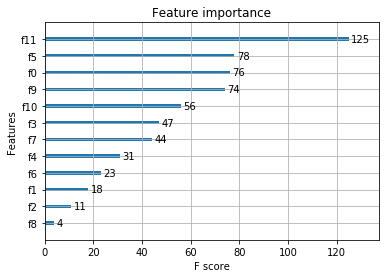

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
xgb.plot_importance(model)

In [ ]:
model.